In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
init_notebook_mode(connected=True)
sns.set(style="ticks")
current_palette = sns.color_palette()

## 读取数据到dataframe中，等待分析
> 未来简单分析，我只选取了15年的数据分析

In [2]:
# read data to dataframe
df = pd.read_csv('../input/2015.csv')

print('dataframe shape is:', df.shape)

dataframe shape is: (158, 12)


## 数据初探，主要观察有那些列，是否有数据缺失等

In [3]:
df.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [4]:
df.dtypes # 查看数据类型

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [5]:
df.describe().T # 看一下大概一个统计的数据分布

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


没有数据缺失的情况

In [6]:
df.head().T

,0,1,2,3,4
Country,Switzerland,Iceland,Denmark,Norway,Canada
Region,Western Europe,Western Europe,Western Europe,Western Europe,North America
Happiness Rank,1,2,3,4,5
Happiness Score,7.587,7.561,7.527,7.522,7.427
Standard Error,0.03411,0.04884,0.03328,0.0388,0.03553
Economy (GDP per Capita),1.39651,1.30232,1.32548,1.459,1.32629
Family,1.34951,1.40223,1.36058,1.33095,1.32261
Health (Life Expectancy),0.94143,0.94784,0.87464,0.88521,0.90563
Freedom,0.66557,0.62877,0.64938,0.66973,0.63297
Trust (Government Corruption),0.41978,0.14145,0.48357,0.36503,0.32957


# 单变量分析

## 分析1，看幸福分数分布情况

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



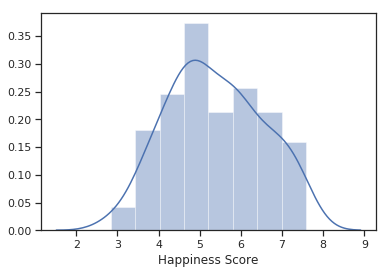

In [7]:
_ = sns.distplot(df['Happiness Score'])

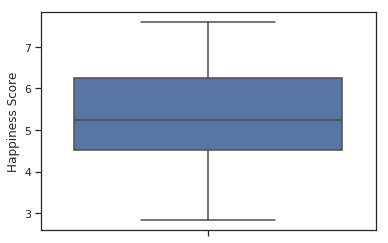

In [8]:
_ = sns.boxplot(y=df['Happiness Score'])

整体上数据是正太分布的，但是35%的人群都是选择中立态度，就是5分

In [9]:
# 看下头部的国家是那5个
display(df.sort_values('Happiness Rank')[['Country','Region']].head(5))
# 幸福感最差的5个国家
display(df.sort_values('Happiness Rank', ascending=False)[['Country','Region']].head(5))

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


,Country,Region
157,Togo,Sub-Saharan Africa
156,Burundi,Sub-Saharan Africa
155,Syria,Middle East and Northern Africa
154,Benin,Sub-Saharan Africa
153,Rwanda,Sub-Saharan Africa


top4的都是西欧国家、第五位是加拿大，幸福感最差的国家无一例外都来之非洲

## 数据分析2，地图数据分析

In [10]:
data = dict(type = 'choropleth', 
            locations = df['Country'],
            locationmode = 'country names',
            z = df['Happiness Score'], 
            text = df['Country'],
            colorbar = {'title':'Happiness Score'})
layout = dict(title = 'Global Happiness', 
              geo = dict(showframe = False,
                         projection = {'type': 'equirectangular'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

眼色越深说明越幸福，可以看到北美的美国、加拿大、澳洲、欧洲这些国家的幸福指数是比较高的，而在俄罗斯、亚洲、中东、非洲、这几个地区幸福指数逐步下降

## 分析3：GDP分布情况

In [11]:
df['Economy (GDP per Capita)'].describe()

count    158.000000
mean       0.846137
std        0.403121
min        0.000000
25%        0.545808
50%        0.910245
75%        1.158448
max        1.690420
Name: Economy (GDP per Capita), dtype: float64

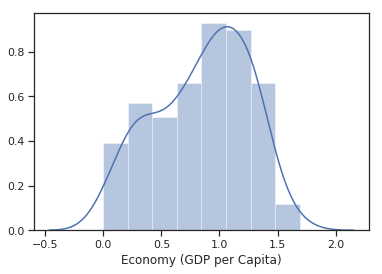

In [12]:
_ = sns.distplot(df['Economy (GDP per Capita)'])

这个是一个偏态分布情况了，GDP在TOP的非常少

In [13]:
avg_gdp = df['Economy (GDP per Capita)'].mean()

In [14]:
# 低于平均水平的国际幸福排名情况
lower_gdp_countries = df[df['Economy (GDP per Capita)'] < avg_gdp][['Country', 'Region', 'Happiness Rank', 'Economy (GDP per Capita)']].sort_values(['Economy (GDP per Capita)'], ascending=False)
display(lower_gdp_countries.head())

,Country,Region,Happiness Rank,Economy (GDP per Capita)
131,Sri Lanka,Southern Asia,132,0.83524
95,Bosnia and Herzegovina,Central and Eastern Europe,96,0.83223
73,Indonesia,Southeastern Asia,74,0.82827
99,Mongolia,Eastern Asia,100,0.82819
64,Jamaica,Latin America and Caribbean,65,0.81038


# 双变量分析

## 分析GDP和幸福得分的关系

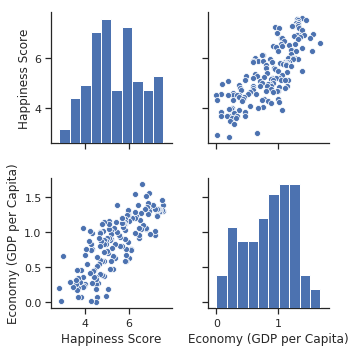

In [15]:
_ = sns.pairplot(df[['Happiness Score', 'Economy (GDP per Capita)']])

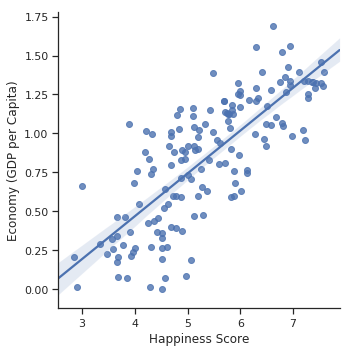

In [16]:
_ = sns.lmplot(x="Happiness Score", y="Economy (GDP per Capita)", data=df)

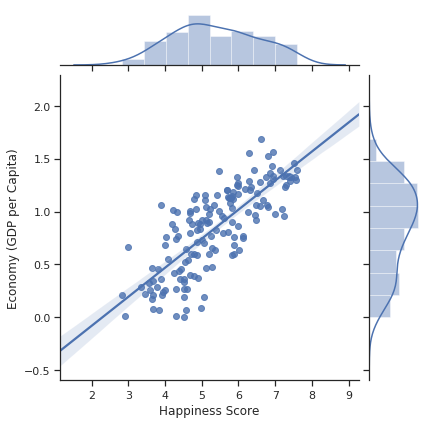

In [17]:
_ = sns.jointplot(x="Happiness Score", y="Economy (GDP per Capita)", data=df, kind="reg");

可以看出 GDP和幸福感还是有非常直接的线性关系的。

# 多变量分析

### 相关系数分析

Happiness Score 相关变量相关系数分析结果：


Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

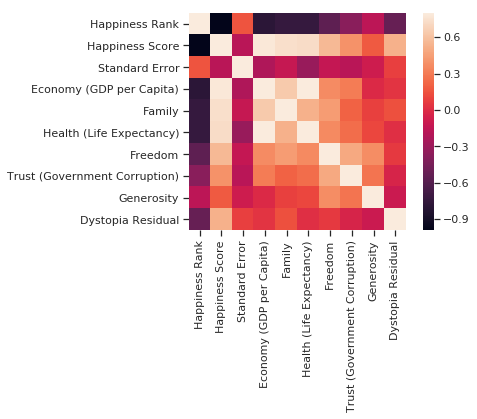

In [18]:
corrmat = df.corr()
print('Happiness Score 相关变量相关系数分析结果：')
display(corrmat['Happiness Score'].sort_values(ascending=False))
_ = sns.heatmap(corrmat, vmax=.8, square=True)

- 可以看到排名和得分完全负相关，这个完全可以理解，分数越高，排名数越小
- 排名关联对最大的几个特征是：
   - Dystopia Residual                0.530474
   - Freedom                          0.568211
   - Health (Life Expectancy)         0.724200
   - Family                           0.740605
   - Economy (GDP per Capita)         0.780966
   
可以看出来幸福指数跟经济，家庭，健康高度相关

# 回归分析

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:

X = df.drop(['Country','Happiness Rank','Happiness Score'], axis=1)
y = df['Happiness Score']


In [22]:
X = pd.get_dummies(X, columns=['Region']) # 将类别型变量one-hot
features = X.columns.tolist()

In [23]:
from sklearn.preprocessing import StandardScaler
sds = StandardScaler()
X = sds.fit_transform(X)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning:

Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning:

Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.



In [24]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
sorted(list(zip(features,[round(x, 4) for x in model.coef_])), key=lambda x: x[1], reverse=True)

[('Dystopia Residual', 0.5518),
 ('Economy (GDP per Capita)', 0.4019),
 ('Family', 0.2715),
 ('Health (Life Expectancy)', 0.2462),
 ('Freedom', 0.1502),
 ('Generosity', 0.1263),
 ('Trust (Government Corruption)', 0.1197),
 ('Standard Error', -0.0),
 ('Region_Australia and New Zealand', -0.0),
 ('Region_Central and Eastern Europe', 0.0),
 ('Region_Eastern Asia', -0.0),
 ('Region_Latin America and Caribbean', 0.0),
 ('Region_Middle East and Northern Africa', -0.0),
 ('Region_North America', -0.0),
 ('Region_Southeastern Asia', -0.0),
 ('Region_Southern Asia', 0.0),
 ('Region_Sub-Saharan Africa', -0.0),
 ('Region_Western Europe', -0.0)]

我们通过线性回归可以得到各个特征的权重，也就说明各个特征最后影响Happiness Score的权重

排名如上显示最明显的是
- Dystopia Residual
- Economy (GDP per Capita)
- Family
- Health

# 最后

20分钟时间太短，做不了太多详细的分析，所以我选取了几个重点的地方分析，得出最后的结论是

一个国家是不是幸福几个关键的因数是：
- 国家的安全，是不是有战乱
- 国家收入GDP
- 家庭是不是幸福
- 是不是有好的医疗条件

感谢您的审阅，不足之处感谢批评指正
